
## Resources
- Think DSP: Digital Signal Processing in Python by Allen B. Downey [[website](http://greenteapress.com/wp/think-dsp/)] [[pdf](http://greenteapress.com/thinkdsp/thinkdsp.pdf)] [[github](http://greenteapress.com/wp/think-dsp/)]
- Basic Signal Processing in Python: https://youtu.be/0ALKGR0I5MA




In [1]:
import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/
import numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/
import scipy as sp # for signal processing
from scipy import signal
import IPython.display as ipd # for playing sound https://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html#IPython.lib.display.Audio
import matplotlib as mpl


In [2]:
# Helper functions

# Plots a sine wave signal to axis
def plot_signal_to_axes(ax, s, sampling_rate, title="", signal_label=None):
    ax.plot(s, label=signal_label)
    ax.set(xlabel="samples")
    
    if signal_label is not None:
        ax.legend()

    # we use y=1.14 to make room for the secondary x-axis
    # see: https://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny
    ax.set_title(title, y=1.2)
    ax.grid()

    # add in a secondary x-axis to draw the x ticks as time (rather than samples)
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xlabel("time (secs)")
    ax_ticks = ax.get_xticks()[1:-1]
    ax2_tick_labels = ax.get_xticks()[1:-1] / sampling_rate
    ax2_tick_labels = ['{:.2f}s'.format(x) for x in ax2_tick_labels]
    ax2.set_xticks(ax_ticks)
    ax2.set_xticklabels(ax2_tick_labels)
    
def plot_multiple_freq(freqs, signal_combined, map_freq_to_signal, sampling_rate):
    n_rows = len(freqs) + 1 # one for each freq + combined on top
    n_cols = 1
    height_per_row = 4
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * height_per_row))
    fig.subplots_adjust(hspace=0.7)

    plot_signal_to_axes(axes[0], signal_combined, sampling_rate, '{}Hz'.format(freqs).
             format(freq_of_note, total_time_in_secs, sampling_rate))
    axis_index = 1
    for freq in freqs:
        ax = axes[axis_index]
        signal_for_freq = map_freq_to_signal[freq]
        plot_signal_to_axes(ax, signal_for_freq[:1000], sampling_rate, 'Sine Wave with Freq={}Hz Time={}s Sampling Rate={}Hz'.
             format(freq, total_time_in_secs, sampling_rate))
        axis_index += 1
        
def plot_aligned_signal_comparisons(a, b):
    corr_result_ab = signal.correlate(a,b)
    best_correlation_point = np.argmax(corr_result_ab)
    index_shift = len(a) - np.argmax(corr_result_ab)
    a_shifted = np.roll(a, index_shift - 1)

    euclid_distance_a_to_b = distance.euclidean(a, b)
    euclid_distance_ashifted_to_b = distance.euclidean(a_shifted, b)
    print("Best correlation point={}, euclidean distance a to b={}, euclidean distance a_shifted to b={}"
          .format(best_correlation_point, euclid_distance_a_to_b, euclid_distance_ashifted_to_b))

    fig, axes = plt.subplots(3, figsize=(12, 13))
    fig.subplots_adjust(hspace=0.3)

    axes[0].plot(a, alpha=0.7, label="a", marker="o")
    axes[0].plot(b, alpha=0.7, label="b", marker="D")
    axes[0].legend()
    axes[0].set_title("Raw Graphs | Euclidean Distance From A to B = {}".format(euclid_distance_a_to_b))

    # Note that the correlation signal is the length of a + b but that's because
    # of how correlation works: it slides the two signals across each other to compute the correlation
    axes[1].plot(corr_result_ab, alpha=0.7)
    axes[1].set_title("Correlation Between A and B (Best Correlation Index = {})".format(best_correlation_point))

    axes[2].plot(a_shifted, alpha=0.7, label="a_shifted", marker="o")
    axes[2].plot(b, alpha=0.7, label="b", marker="D")
    axes[2].legend()
    axes[2].set_title("Shifted Graph | Euclidean Distance From A_Shifted to B = {}".format(euclid_distance_ashifted_to_b))
  
def create_sine_wave(freq, sampling_rate, total_time_in_secs):
    # Create an array from 0 to total_time_in_secs * sampling_rate (and then divide by sampling
    # rate to get each time_step)
    time = np.arange(total_time_in_secs * sampling_rate) / sampling_rate
    
    # Could also generate this signal by:
    # time = np.linspace(0, total_time_in_secs, int(total_time_in_secs * sampling_rate), endpoint=False)

    sine_wave = np.sin(2 * np.pi * freq * time)
    return sine_wave

def create_cos_wave(freq, sampling_rate, total_time_in_secs):
    # Create an array from 0 to total_time_in_secs * sampling_rate (and then divide by sampling
    # rate to get each time_step)
    time = np.arange(total_time_in_secs * sampling_rate) / sampling_rate
    cos_wave = np.cos(2 * np.pi * freq * time)
    return cos_wave

# Basic Waves

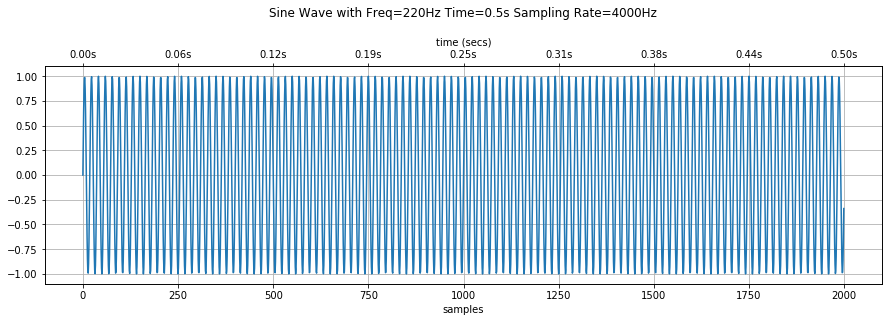

In [3]:
total_time_in_secs = 0.5

# Common sound sampling rates are 8000, 11025, 22050, 44100
# See: https://manual.audacityteam.org/man/sample_rates.html
sampling_rate = 4000

# Try changing the frequency here. What happens?
# What's the lowest sound your speakers can produce (or you can hear?)
# What's the highest frequency sound?
# What happens if this freq exceeds the sampling_rate?
# Recall the nyquist frequency: the highest freq we can produce is less than 1/2 * sampling_rate
freq = 220 # in Hz; 

# Create an array from 0 to total_time_in_secs * sampling_rate 
# But we need to divide each value in this array by our sampling_rate so that our time step (dt) is correct
time = np.arange(total_time_in_secs * sampling_rate) / sampling_rate

# Could also generate this signal by:
# time = np.linspace(0, total_time_in_secs, int(total_time_in_secs * sampling_rate), endpoint=False)

s = np.sin(2 * np.pi * freq * time)

fig, ax = plt.subplots(figsize=(15,4))
plot_signal_to_axes(ax, s, sampling_rate, 'Sine Wave with Freq={}Hz Time={}s Sampling Rate={}Hz'.
             format(freq, total_time_in_secs, sampling_rate))

ipd.Audio(s, rate=sampling_rate) # load a NumPy array

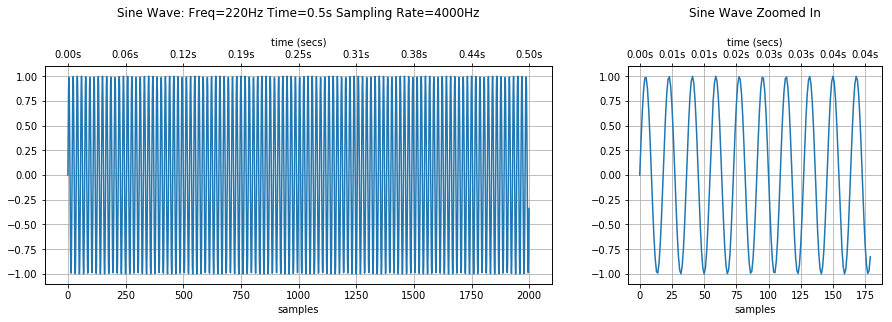

In [4]:
# Show the full waveform next to a zoomed in view
n_rows = 1
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,4), gridspec_kw={'width_ratios': [2, 1]})
plot_signal_to_axes(axes[0], s, sampling_rate, 'Sine Wave: Freq={}Hz Time={}s Sampling Rate={}Hz'.
                    format(freq, total_time_in_secs, sampling_rate))

# show a zoomed in view of ~10 periods
num_periods_to_show = 10
plot_signal_to_axes(axes[1], s[0: int(sampling_rate/freq)*num_periods_to_show], 
                    sampling_rate, 'Sine Wave Zoomed In')
ipd.Audio(s, rate=sampling_rate) # load a NumPy array

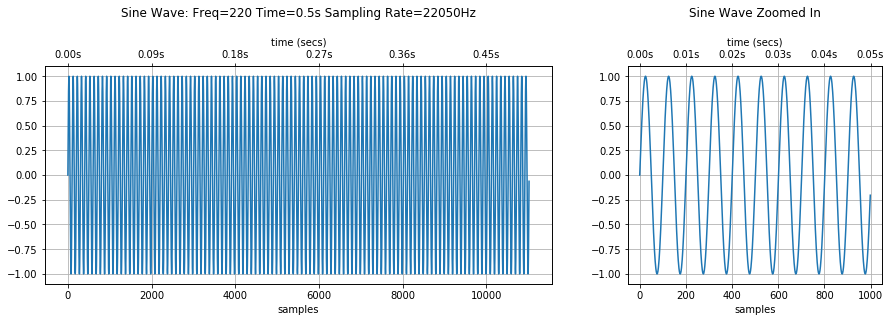

In [6]:
# Higher sampling rate
sampling_rate = 22050

time = np.arange(total_time_in_secs * sampling_rate) / sampling_rate
s = np.sin(2 * np.pi * freq * time)

fig, axes = plt.subplots(1, 2, figsize=(15,4), gridspec_kw={'width_ratios': [2, 1]})
plot_signal_to_axes(axes[0], s, sampling_rate, 'Sine Wave: Freq={} Time={}s Sampling Rate={}Hz'.
                    format(freq, total_time_in_secs, sampling_rate))

# show a zoomed in view of ~10 periods
num_periods_to_show = 10
plot_signal_to_axes(axes[1], s[0: int(sampling_rate/freq)*num_periods_to_show], 
                    sampling_rate, 'Sine Wave Zoomed In')
ipd.Audio(s, rate=sampling_rate) # load a NumPy array

# Signal Comparisons

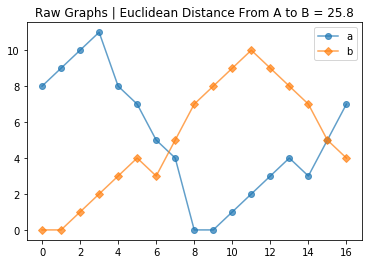

In [7]:
# Use Euclidean distance to compare two signals
from scipy import signal
from scipy.spatial import distance

a = [8, 9, 10, 11, 8, 7, 5, 4, 0, 0, 1, 2, 3, 4, 3, 5, 7]
b = [0, 0, 1, 2, 3, 4, 3, 5, 7, 8, 9, 10, 9, 8, 7, 5, 4]

euclid_distance_a_to_b = distance.euclidean(a, b)

fig, axes = plt.subplots()

axes.plot(a, alpha=0.7, label="a", marker="o")
axes.plot(b, alpha=0.7, label="b", marker="D")
axes.legend()
axes.set_title("Raw Graphs | Euclidean Distance From A to B = {:0.1f}".format(euclid_distance_a_to_b))
print()

Best correlation point=8, euclidean distance a to b=25.768197453450252, euclidean distance a_shifted to b=2.0



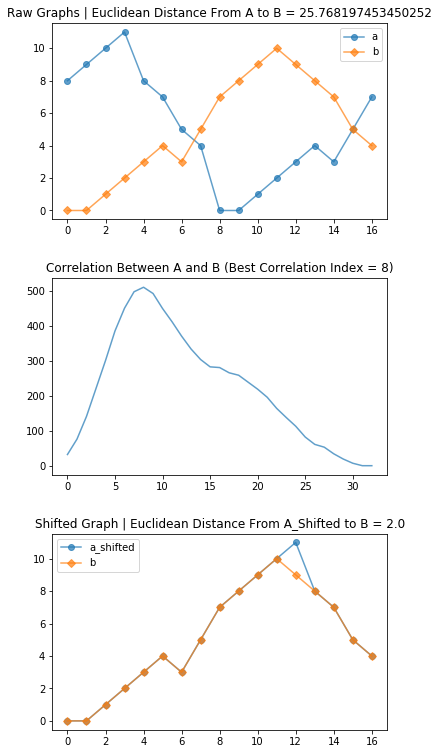

In [8]:
# Now let's use correlation to align the signals before comparison
corr_result_ab = signal.correlate(a,b)
best_correlation_point = np.argmax(corr_result_ab)
index_shift = len(a) - np.argmax(corr_result_ab)
a_shifted = np.roll(a, index_shift)

euclid_distance_a_to_b = distance.euclidean(a, b)
euclid_distance_ashifted_to_b = distance.euclidean(a_shifted, b)
print("Best correlation point={}, euclidean distance a to b={}, euclidean distance a_shifted to b={}"
      .format(best_correlation_point, euclid_distance_a_to_b, euclid_distance_ashifted_to_b))

fig, axes = plt.subplots(3, figsize=(6, 13))
fig.subplots_adjust(hspace=0.3)

axes[0].plot(a, alpha=0.7, label="a", marker="o")
axes[0].plot(b, alpha=0.7, label="b", marker="D")
axes[0].legend()
axes[0].set_title("Raw Graphs | Euclidean Distance From A to B = {}".format(euclid_distance_a_to_b))

# Note that the correlation signal is the length of a + b but that's because
# of how correlation works: it slides the two signals across each other to compute the correlation
axes[1].plot(corr_result_ab, alpha=0.7)
axes[1].set_title("Correlation Between A and B (Best Correlation Index = {})".format(best_correlation_point))

axes[2].plot(a_shifted, alpha=0.7, label="a_shifted", marker="o")
axes[2].plot(b, alpha=0.7, label="b", marker="D")
axes[2].legend()
axes[2].set_title("Shifted Graph | Euclidean Distance From A_Shifted to B = {}".format(euclid_distance_ashifted_to_b))
print()

Best correlation point=169, euclidean distance a to b=12.165525060596439, euclidean distance a_shifted to b=1.973205017723358


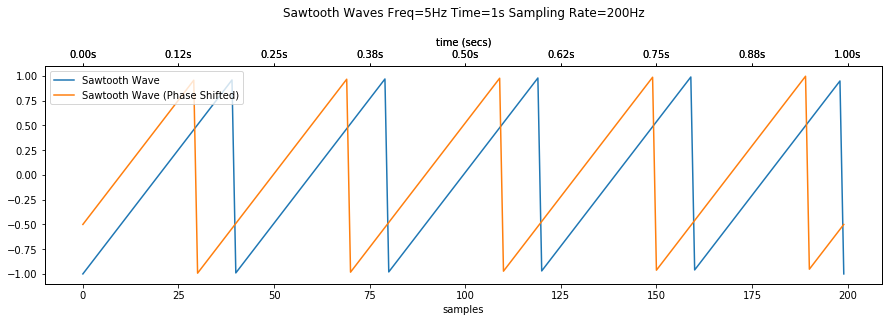

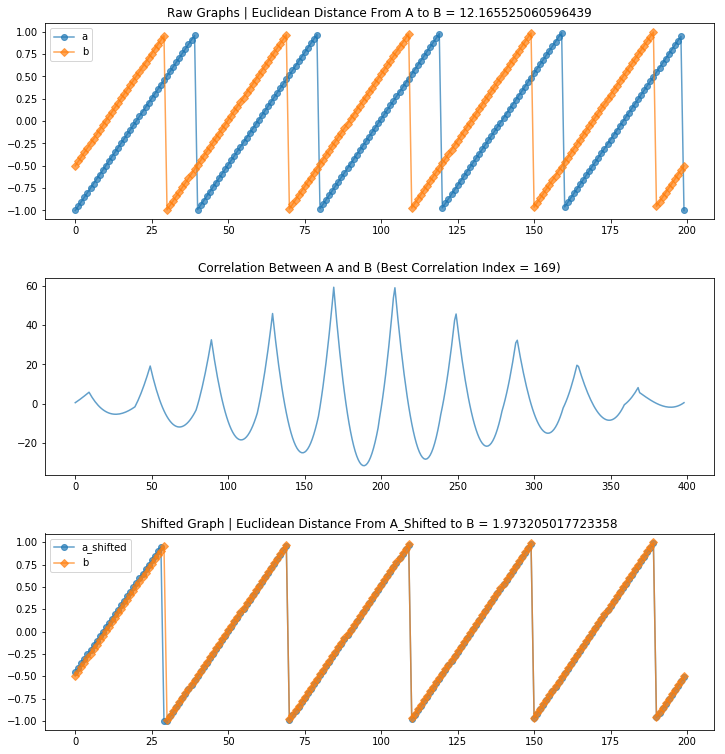

In [10]:
total_time_in_secs = 1
sampling_rate = 200
freq = 5

t = np.linspace(0, total_time_in_secs, sampling_rate)
sawtooth_a = signal.sawtooth(2 * np.pi * freq * t)
sawtooth_b = signal.sawtooth(2 * np.pi * freq * t + np.pi/2)
fig, ax = plt.subplots(figsize=(15,4))

title = 'Sawtooth Waves Freq={}Hz Time={}s Sampling Rate={}Hz'.\
          format(freq, total_time_in_secs, sampling_rate)
plot_signal_to_axes(ax, sawtooth_a, sampling_rate, title, "Sawtooth Wave")
plot_signal_to_axes(ax, sawtooth_b, sampling_rate, title, "Sawtooth Wave (Phase Shifted)")

plot_aligned_signal_comparisons(sawtooth_a, sawtooth_b)

Best correlation point=209, euclidean distance a to b=14.142135623730951, euclidean distance a_shifted to b=1.5211096026534148e-14


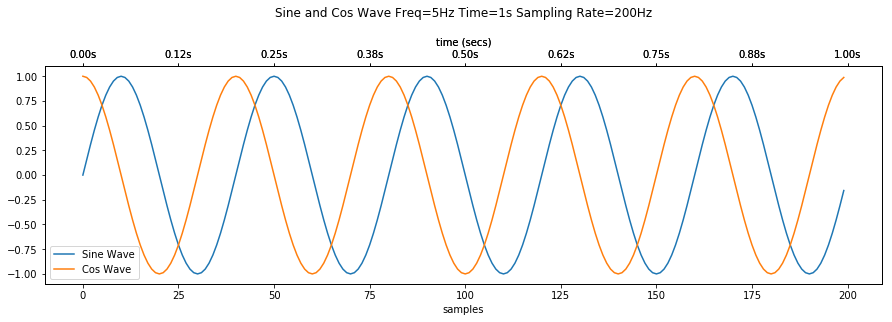

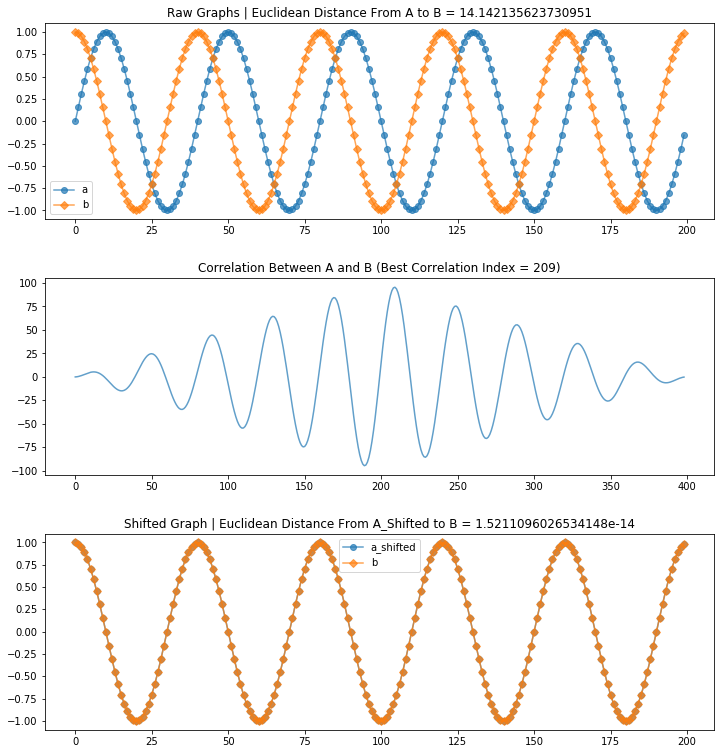

In [11]:
# Create and plot a simple sine and cos wave
total_time_in_secs = 1
sampling_rate = 200
freq = 5

sine_wave = create_sine_wave(freq, sampling_rate, total_time_in_secs)
cos_wave = create_cos_wave(freq, sampling_rate, total_time_in_secs)

fig, ax = plt.subplots(figsize=(15,4))
title = 'Sine and Cos Wave Freq={}Hz Time={}s Sampling Rate={}Hz'.\
          format(freq, total_time_in_secs, sampling_rate)

plot_signal_to_axes(ax, sine_wave, sampling_rate, title, "Sine Wave")
plot_signal_to_axes(ax, cos_wave, sampling_rate, title, "Cos Wave")

plot_aligned_signal_comparisons(sine_wave, cos_wave)

# Additive Synthesis

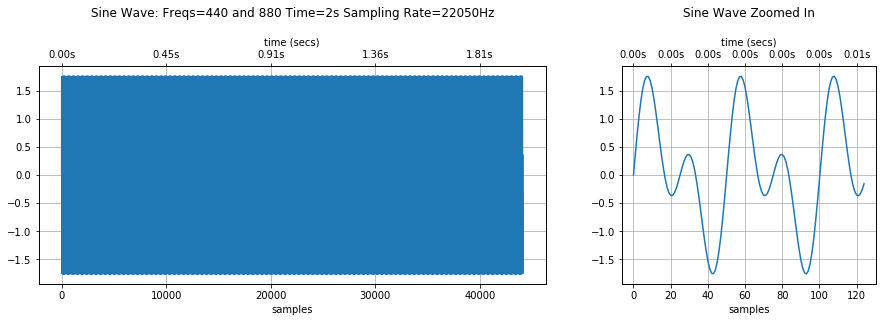

In [12]:
# Show additive nature of waves

total_time_in_secs = 2
sampling_rate = 22050

# Create an array from 0 to total_time_in_secs * sampling_rate (and then divide by sampling
# rate to get each time_step)
time = np.arange(total_time_in_secs * sampling_rate) / sampling_rate

# Could also generate this signal by:
# time = np.linspace(0, total_time_in_secs, int(total_time_in_secs * sampling_rate), endpoint=False)
freq1 = 440
freq2 = 880
signal1 = np.sin(2 * np.pi * freq1 * time)
signal2 = np.sin(2 * np.pi * freq2 * time)
signal_combined = signal1 + signal2

n_rows = 1
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,4), gridspec_kw={'width_ratios': [2, 1]})
plot_signal_to_axes(axes[0], signal_combined, sampling_rate, 'Sine Wave: Freqs={} and {} Time={}s Sampling Rate={}Hz'.
                    format(freq1, freq2, total_time_in_secs, sampling_rate))

# show a zoomed in view of ~10 periods
plot_signal_to_axes(axes[1], signal_combined[0: int(sampling_rate/freq2)*5], sampling_rate, 'Sine Wave Zoomed In')
ipd.Audio(signal_combined, rate=sampling_rate) # load a NumPy array

# Noise and Smoothing

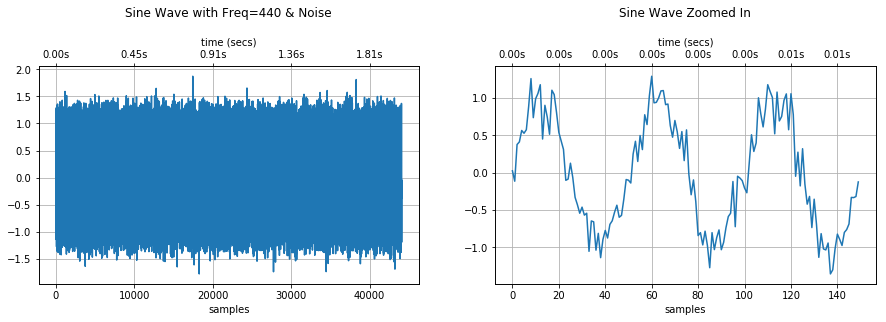

In [13]:
# Show addition of noise
total_time_in_secs = 2
freq = 440 # in Hz
sampling_rate = 22050

# Create an array from 0 to total_time_in_secs * sampling_rate (and then divide by sampling
# rate to get each time_step)
time = np.arange(total_time_in_secs * sampling_rate) / sampling_rate

signal = np.sin(2 * np.pi * freq * time)

noise_amt = 0.2 # higher amount, higher noise
noise = np.random.normal(0,noise_amt,len(time))

signal_with_noise = signal + noise
n_rows = 1
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,4))
plot_signal_to_axes(axes[0], signal_with_noise, sampling_rate, 'Sine Wave with Freq={} & Noise'.format(freq))

# show a zoomed in view
plot_signal_to_axes(axes[1], signal_with_noise[0: int(sampling_rate/freq)*3], sampling_rate, 'Sine Wave Zoomed In')
ipd.Audio(signal_with_noise, rate=sampling_rate) # load a NumPy array

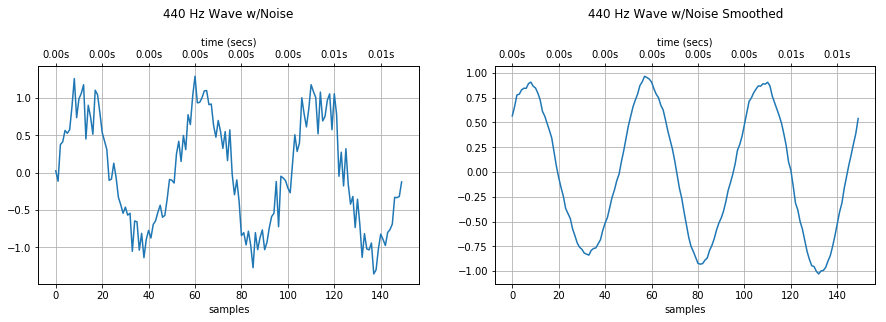

In [15]:
# shows how to apply a mean filter via convolution with a given window size
filter_window_size = 11
signal_smoothed_mean = np.convolve(signal_with_noise, np.ones((filter_window_size,))/filter_window_size, mode='valid') 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,4))
num_periods_to_show = 3
num_samples = int(sampling_rate/freq)*num_periods_to_show
plot_signal_to_axes(axes[0], signal_with_noise[0: num_samples], sampling_rate, '{} Hz Wave w/Noise'.format(freq))
plot_signal_to_axes(axes[1], signal_smoothed_mean[0: num_samples], sampling_rate, '{} Hz Wave w/Noise Smoothed'.format(freq))
ipd.Audio(signal_smoothed_mean, rate=sampling_rate) 

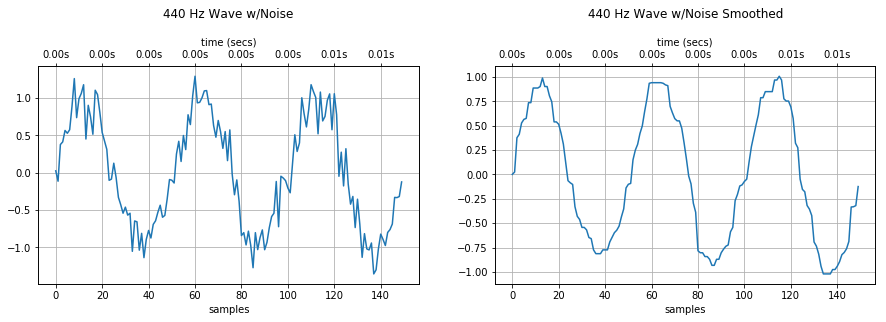

In [16]:
# Shows how to apply a median filter using scipy
filter_window_size = 11
signal_smoothed_median = sp.signal.medfilt(signal_with_noise, filter_window_size)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,4))
num_periods_to_show = 3
num_samples = int(sampling_rate/freq)*num_periods_to_show
plot_signal_to_axes(axes[0], signal_with_noise[0: num_samples], sampling_rate, '{} Hz Wave w/Noise'.format(freq))
plot_signal_to_axes(axes[1], signal_smoothed_median[0: num_samples], sampling_rate, '{} Hz Wave w/Noise Smoothed'.format(freq))

ipd.Audio(signal_smoothed_median, rate=sampling_rate) 

In [18]:
# Concatate waves to make a scale and then analyze waveform using ffts
c_scale = [261.626, 293.665, 329.628, 349.228, 391.995, 440, 493.883, 523.251] # c scale starting with middle c at 261.626
# plt.plot(c_scale)
# plt.show()

total_time_per_note_in_secs = 1
sampling_rate = 11025

signal_combined = np.array([])
map_freq_to_signal = dict()
for freq_of_note in c_scale:
    signal_for_note = create_sine_wave(freq_of_note, sampling_rate, total_time_per_note_in_secs)
    map_freq_to_signal[freq_of_note] = signal_for_note
    signal_combined = np.concatenate((signal_combined, signal_for_note))
    
# plot_multiple_freq(c_scale, signal_combined, map_freq_to_signal, sampling_rate)

ipd.Audio(signal_combined, rate=sampling_rate) 

# FFT
A Fast Fourier Transform (FFT) samples a signal and extracts the frequency components. It is used to transform a signal from the time-domain to the frequency-domain.
![Time vs. Frequency view of signal](https://upload.wikimedia.org/wikipedia/commons/6/61/FFT-Time-Frequency-View.png "View of a signal in the time and frequency domain") 

For example, the signal below consists of a sum of cosine waves at 10, 20, 30, 40, and 50 Hz.
![FFT of an example signal](https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/FFT_of_Cosine_Summation_Function.png/800px-FFT_of_Cosine_Summation_Function.png)

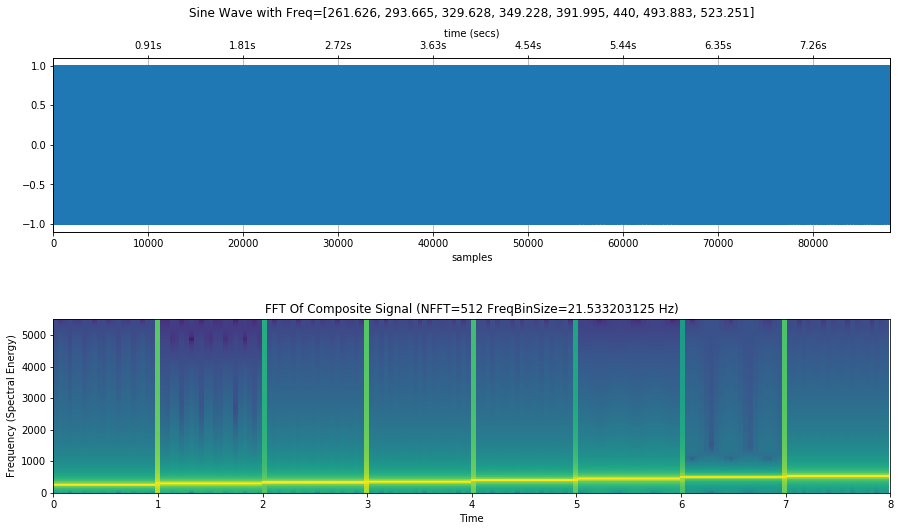

In [19]:
# Frequency analysis
fig, axes = plt.subplots(2, 1, figsize=(15,8))
fig.subplots_adjust(hspace=0.5)
freqs = c_scale

axes[0].set_xlim(xmin=0,xmax=total_time_per_note_in_secs * len(freqs) * sampling_rate)
plot_signal_to_axes(axes[0], signal_combined, sampling_rate, 'Sine Wave with Freq={}'.format(freqs))

# NFFT is the num of points from sample used to calculate the FFT. Must be greater than 1/2 sampling rate
# noverlap is the num of overlapping points between NFFT windows

# You can calculate your frequency resolution (that is the size of each frequency bin)
# by FreqResolution = SamplingRate / FFTWindowSize
fft_window_size = 512
axes[1].specgram(signal_combined, NFFT=fft_window_size, Fs=sampling_rate, noverlap=0)
axes[1].set(xlabel='Time', ylabel="Frequency (Spectral Energy)", 
            title='FFT Of Composite Signal (NFFT={} FreqBinSize={} Hz)'.
            format(fft_window_size, sampling_rate/fft_window_size))
# axes[1].set_xlim(axes[0].get_xlim())
axes[1].set_xlim(xmin=0, xmax=total_time_per_note_in_secs * len(freqs))
print()

# Sandbox
Everything below here is just a sandbox for me to play.

In [ ]:
# Sample from: https://musicinformationretrieval.com/ipython_audio.html
import IPython.display as ipd

sr = 512 # sample rate 22050
T = 5.0    # seconds
freq = 440
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
print(t)
x = 0.5*np.sin(2*np.pi*freq*t)                # pure sine wave at 440 Hz

fig, ax = plt.subplots(figsize=(15,4))
ax.plot(x)
ax.set(xlabel='samples', title='Sine Wave with Freq={}'.format(freq))
ax.grid()

ipd.Audio(x, rate=sr) # load a NumPy array

# Outline
- Filtering
- FFT
  - Show how to calculate and use (maybe draw bar graph)
- Cross correlation
- Signal comparisons
  - show a few simple examples, including sin and cos (which are phase shifted)

## Ideas:
- Use audio as primary signal. You can play audio within Jupyter notebook https://musicinformationretrieval.com/ipython_audio.html
- Show effect of smoothing, etc.
- Show effects like reverb?

## Lecture Ideas for Future
- Go over cross-correlation algorithm (e.g., https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html)
- Go over convolution algorithm and how it can be used for filtering